# IFT870 Project - TEDflix

Maxime Lafont--Trevisan (lafm2724)  
Gaëtan Lounes (loug2904)  
Victor Taillieu (taiv2701)  
Luca Vaio (vail3202)

In [1]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
ted_talks = pd.read_csv("../data/ted_talks_en.csv")
ted_talks.sort_values("talk_id", inplace=True, ignore_index=True)
ted_talks.drop("url", axis=1, inplace=True)
# ted_talks.drop("available_lang", axis=1, inplace=True)
ted_talks

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,2,Simple designs to save a life,Amy Smith,{0: 'Amy Smith'},"{0: ['inventor', 'engineer']}","{0: 'Amy Smith designs cheap, practical fixes ...",1724438,2006-02-24,2006-08-15,TED2006,en,"['ar', 'bg', 'ca', 'de', 'el', 'en', 'es', 'fa...",101.0,906,"['MacArthur grant', 'alternative energy', 'des...","{1561: 'Energy from floating algae pods', 1072...",Fumes from indoor cooking fires kill more than...,"In terms of invention, I'd like to tell you th..."
2,3,How to rebuild a broken state,Ashraf Ghani,{0: 'Ashraf Ghani'},{0: ['president-elect of afghanistan']},"{0: 'Ashraf Ghani, Afghanistan’s new president...",981920,2005-07-12,2006-10-18,TEDGlobal 2005,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",75.0,1125,"['business', 'corruption', 'culture', 'economi...","{127: 'Want to help Africa? Do business here',...",Ashraf Ghani's passionate and powerful 10-minu...,"A public, Dewey long ago observed, is constitu..."
3,4,The real future of space exploration,Burt Rutan,{0: 'Burt Rutan'},{0: ['aircraft engineer']},"{0: ""In 2004, legendary spacecraft designer Bu...",2427994,2006-02-24,2006-10-25,TED2006,en,"['ar', 'az', 'bg', 'cs', 'de', 'el', 'en', 'es...",196.0,1177,"['NASA', 'aircraft', 'business', 'design', 'en...","{141: ""Inside the world's deepest caves"", 264:...","In this passionate talk, legendary spacecraft ...","I want to start off by saying, Houston, we hav..."
4,5,Great cars are great art,Chris Bangle,{0: 'Chris Bangle'},{0: ['car designer']},{0: 'Car design is a ubiquitous but often over...,978483,2002-02-02,2007-04-05,TED2002,en,"['ar', 'bg', 'de', 'en', 'es', 'fr', 'he', 'hr...",81.0,1204,"['business', 'cars', 'design', 'industrial des...","{4: 'The real future of space exploration', 26...",American designer Chris Bangle explains his ph...,"What I want to talk about is, as background, i..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62707,The wildly complex anatomy of a sneaker,Angel Chang,{0: 'Angel Chang'},NaN,{0: 'Angel Chang is a womenswear designer work...,219171,2020-04-23,2020-04-23,TED-Ed,en,"['el', 'en', 'es', 'fr', 'ko', 'pt', 'pt-br']",NaN,303,"['TED-Ed', 'education', 'animation', 'fashion'...",{2756: 'What really happens to the plastic you...,"Australians call them ""runners."" The British k...","Australians call them “runners."" The British k..."
4001,62748,A global pandemic calls for global solutions,Larry Brilliant,"{0: 'Larry Brilliant', 1: 'Chris Anderson'}","{0: ['epidemiologist', 'philanthropist'], 1: [...","{0: ""TED Prize winner Larry Brilliant has spen...",760969,2020-04-22,2020-04-24,TED2020: The Prequel,en,"['en', 'es', 'it', 'pt-br']",37.0,941,"['coronavirus', 'pandemic', 'epidemiology', 'v...","{58: 'My wish: Help me stop pandemics', 61303:...",Examining the facts and figures of the coronav...,"Helen Walters: So, Chris, who's up first? Chri..."
4002,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,202

# Basic exploration

## Types

In [3]:
ted_talks.dtypes

talk_id             int64
title              object
speaker_1          object
all_speakers       object
occupations        object
about_speakers     object
views               int64
recorded_date      object
published_date     object
event              object
native_lang        object
available_lang     object
comments          float64
duration            int64
topics             object
related_talks      object
description        object
transcript         object
dtype: object

## Missing values

In [4]:
ted_talks.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
description         0
transcript          0
dtype: int64

In [5]:
ted_talks[ted_talks.all_speakers.isnull()]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript
2972,23418,How prefab homes can transform affordable housing,Antón García-Abril,NaN,NaN,NaN,14934,2016-11-19,2018-09-04,TEDxYouth@Beaconstreet,en,"['en', 'es']",NaN,449,"['design', 'architecture', 'industrial design'...","{1015: 'Creative houses from reclaimed stuff',...",When architect Antón García-Abril moved to Bos...,Subtitle Provided by JUFE MOOC Studio M Subtit...
3456,36384,Why we need to stop obsessing over World War II,Keith Lowe,NaN,NaN,NaN,103682,2014-11-15,2019-03-01,TEDxAthens,en,"['en', 'pt', 'sr']",NaN,1109,"['war', 'history', 'society', 'future', 'globa...","{1999: 'Why veterans miss war', 1651: 'What I ...",Why are we so obsessed with World War II? Hist...,Hello everybody. Audience: Hello. Keith Lowe: ...
3473,36844,Why talent carries you further than fame,Maisie Williams,NaN,NaN,NaN,3677746,2019-02-03,2019-03-11,TEDxManchester,en,"['ar', 'de', 'el', 'en', 'es', 'fr', 'hu', 'pt...",NaN,982,"['art', 'entertainment', 'entrepreneur', 'tech...",{39192: 'Why medieval politics was nothing lik...,You'd never know from her transformation into ...,Hi. I'm Maisie Williams. And I'm kind of just ...
3719,49223,Are we living in a simulation?,Zohreh Davoudi,NaN,NaN,NaN,485122,2019-10-08,2019-10-08,TED-Ed,en,"['ar', 'el', 'en', 'es', 'fa', 'fr', 'he', 'id...",NaN,249,"['TED-Ed', 'animation', 'education', 'technolo...","{26263: 'Does time exist?', 24106: 'How do you...","All life on Earth— living and inanimate, micro...","We live in a vast universe, on a small wet pla..."


## Speakers

### Number of speakers

In [6]:
def to_dict(x):
    if pd.isna(x):
        return x
    return ast.literal_eval(x)

In [7]:
speakers_dict = ted_talks["all_speakers"].apply(to_dict)
nb_speakers = speakers_dict.apply(lambda x: len(x) if pd.notnull(x) else 1)

nb_speakers.value_counts()

1    3891
2      97
3      13
4       3
5       1
Name: all_speakers, dtype: int64

In [8]:
nb_speakers.value_counts() / len(nb_speakers) * 100

1    97.153558
2     2.421973
3     0.324594
4     0.074906
5     0.024969
Name: all_speakers, dtype: float64

### Most active speakers

In [9]:
ted_talks.speaker_1.value_counts().head(15)

Alex Gendler        34
Iseult Gillespie    19
Emma Bryce          12
Daniel Finkel       11
Hans Rosling        10
Alex Rosenthal      10
Juan Enriquez        9
Greg Gage            9
Chris Anderson       8
Marco Tempest        7
Dan Ariely           7
Joy Lin              6
Stewart Brand        6
Bill Gates           6
 Rives               6
Name: speaker_1, dtype: int64

## Languages

In [10]:
ted_talks.native_lang.value_counts()

en       3957
es         27
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64

In [11]:
ted_talks.native_lang.value_counts() / len(ted_talks) * 100

en       98.801498
es        0.674157
fr        0.224719
ja        0.074906
hi        0.049938
de        0.024969
pt        0.024969
ko        0.024969
zh-cn     0.024969
ar        0.024969
pt-br     0.024969
it        0.024969
Name: native_lang, dtype: float64

# Preprocessing

## Format dictionary columns

In [12]:
ast.literal_eval(ted_talks.all_speakers.iloc[0])

{0: 'Al Gore'}

In [13]:
ted_talks.occupations.iloc[0]

"{0: ['climate advocate']}"

In [14]:
occup = ted_talks.occupations.apply(lambda x: to_dict(x)[0] if pd.notnull(x) else ["unknown"])
occup

0                     [climate advocate]
1                   [inventor, engineer]
2       [president-elect of afghanistan]
3                    [aircraft engineer]
4                         [car designer]
                      ...               
4000                           [unknown]
4001    [epidemiologist, philanthropist]
4002                           [unknown]
4003                           [unknown]
4004                           [unknown]
Name: occupations, Length: 4005, dtype: object

In [15]:
about = ted_talks.about_speakers.apply(lambda x: to_dict(x)[0] if pd.notnull(x) else "unknown")
about

0       Nobel Laureate Al Gore focused the world’s att...
1       Amy Smith designs cheap, practical fixes for t...
2       Ashraf Ghani, Afghanistan’s new president-elec...
3       In 2004, legendary spacecraft designer Burt Ru...
4       Car design is a ubiquitous but often overlooke...
                              ...                        
4000    Angel Chang is a womenswear designer working w...
4001    TED Prize winner Larry Brilliant has spent his...
4002                                              unknown
4003                                              unknown
4004                                              unknown
Name: about_speakers, Length: 4005, dtype: object

## Dates

In [16]:
ted_talks[ted_talks.recorded_date.isnull()]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript
3871,56629,The unpaid work that GDP ignores -- and why it...,Marilyn Waring,{0: 'Marilyn Waring'},{0: ['economist']},{0: 'Marilyn Waring advocates for a public pol...,1276272,NaN,2020-01-23,TEDxChristchurch,en,"['en', 'es', 'fr', 'it', 'ko', 'pt', 'tr', 'vi...",20.0,1039,"['global development', 'development', 'social ...",{46582: 'Why governments should prioritize wel...,"If you: do laundry, are (or have been) pregnan...",(In Maori: My mountain is Taupiri.) (Waikato i...


In [17]:
ted_talks.recorded_date.fillna(ted_talks.published_date)

0       2006-02-25
1       2006-02-24
2       2005-07-12
3       2006-02-24
4       2002-02-02
           ...    
4000    2020-04-23
4001    2020-04-22
4002    2020-04-27
4003    2020-04-28
4004    2020-04-30
Name: recorded_date, Length: 4005, dtype: object

## Comments

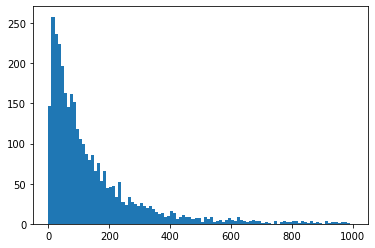

In [18]:
plt.hist(ted_talks.comments, bins=100, range=[0, 1000])
plt.show()

In [19]:
ted_talks[ted_talks.comments == 0]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript
3899,57920,The power of the Afro pick,Jon Gray,{0: 'Jon Gray'},"{0: ['food enthusiast', 'dishwasher']}",{0: 'Culinary evangelist Jon Gray is the voice...,208222,2020-02-04,2020-02-17,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'tr']",0.0,213,"['design', 'history', 'culture', 'creativity',...",{44259: 'The next big thing is coming from the...,The Afro pick is much more than a styling tool...,"You don't really look at a toothbrush and say,..."
3920,58706,How surfboards connect us to nature,Yves Béhar,{0: 'Yves Béhar'},{0: ['designer']},"{0: 'Yves Béhar is a designer, entrepreneur an...",181783,2020-02-11,2020-02-18,Small Thing Big Idea,en,"['ar', 'en', 'es', 'fr', 'pt-br', 'tr']",0.0,203,"['oceans', 'design', 'creativity', 'water', 's...","{57920: 'The power of the Afro pick', 57917: '...",Here's how the surfboard changed our relations...,Riding a wave is like suddenly gaining speed a...


In [20]:
ted_talks[ted_talks.comments.isnull()]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,description,transcript
1066,1323,"""Women of Hope""",Morley,{0: ' Morley'},{0: ['singer-songwriter']},"{0: 'Recording artist, singer, and composer Mo...",365088,2011-12-01,2012-01-13,TEDxWomen 2011,en,"['ar', 'bg', 'ca', 'cs', 'de', 'el', 'en', 'es...",NaN,330,"['TEDx', 'activism', 'music', 'poetry', 'women...","{823: 'Singing old poems to life', 1068: 'Poem...","Inspired by Aung San Suu Kyi's call to action,...",(Music) ♫ They stood together ♫ ♫ under a tree...
1739,2041,"Want to innovate? Become a ""now-ist""",Joi Ito,{0: 'Joi Ito'},{0: ['relentless mind']},{0: 'Joi Ito is the former director of the MIT...,2314973,2014-03-14,2014-07-07,TED2014,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",NaN,751,"['creativity', 'innovation', 'investment', 'sc...","{63: 'The era of open innovation', 1065: 'We a...","""Remember before the internet?"" asks Joi Ito. ...","On March 10, 2011, I was in Cambridge at the M..."
2308,2657,Why do cats act so weird?,Tony Buffington,{0: 'Tony Buffington'},NaN,NaN,8302549,2016-04-26,2017-09-07,TED-Ed,en,"['ar', 'bs', 'da', 'de', 'el', 'en', 'es', 'fa...",NaN,282,"['TED-Ed', 'animals', 'science', 'biology', 'n...",{30507: 'The history of the world according to...,"They're cute, they're lovable, and judging by ...","Why do cats do that? They're cute, they're lov..."
2391,2745,What makes a hero?,Matthew Winkler,{0: 'Matthew Winkler'},NaN,NaN,6349092,2012-12-04,2017-09-07,TED-Ed,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",NaN,261,"['TED-Ed', 'storytelling', 'literature', 'pers...","{17848: ""The Irish myth of the Giant's Causewa...",What trials unite not only Harry Potter or Fro...,"What do Harry Potter, Katniss Everdeen, and Fr..."
2392,2746,The science of stage fright (and how to overco...,Mikael Cho,{0: 'Mikael Cho'},NaN,NaN,1132807,2013-10-08,2017-09-07,TED-Ed,en,"['ar', 'en', 'es', 'fr', 'he', 'hy', 'it', 'ja...",NaN,233,"['TED-Ed', 'entertainment', 'fear', 'performan...",{24447: 'How to practice effectively...for jus...,"Heart racing, palms sweating, labored breathin...","Palms sweaty, heart racing, stomach in knots. ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,62554,What's the point(e) of ballet?,Ming Luke,{0: 'Ming Luke'},NaN,NaN,190644,2020-04-20,2020-04-20,TED-Ed,en,"['en', 'fr', 'pt-br']",NaN,279,"['TED-Ed', 'education', 'animation', 'dance', ...","{2763: 'The physics of the ""hardest move"" in b...",A baby cursed at birth. A fierce battle of goo...,A baby cursed at birth. A fierce battle of goo...
4000,62707,The wildly complex anatomy of a sneaker,Angel Chang,{0: 'Angel Chang'},NaN,{0: 'Angel Chang is a womenswear designer work...,219171,2020-04-23,2020-04-23,TED-Ed,en,"['el', 'en', 'es', 'fr', 'ko', 'pt', 'pt-br']",NaN,303,"['TED-Ed', 'education', 'animation', 'fashion'...",{2756: 'What really happens to the plastic you...,"Australians call them ""runners."" The British k...","Australians call them “runners."" The British k..."
4002,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."


### Relation between comments and views

In [21]:
ted_talks.corr()

,talk_id,views,comments,duration
talk_id,1.000000,-0.113291,-0.232926,-0.261955
views,-0.113291,1.000000,0.500748,0.073642
comments,-0.232926,0.500748,1.000000,0.175234
duration,-0.261955,0.073642,0.175234,1.000000


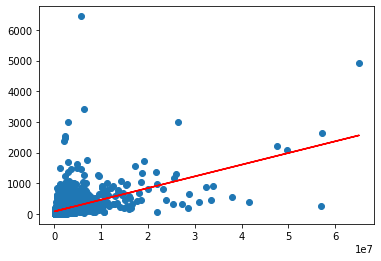

In [22]:
x = ted_talks.dropna(subset="comments").views
y = ted_talks.dropna(subset="comments").comments

a, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, a * x + b, color="red")
plt.show()

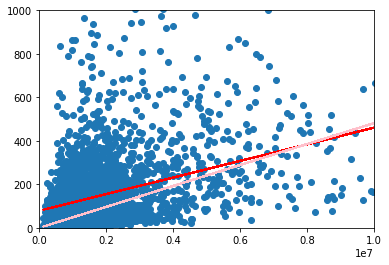

In [23]:
a2, _, _, _ = np.linalg.lstsq(x.to_numpy()[:,np.newaxis], y, rcond=None)

plt.scatter(x, y)
plt.plot(x, a * x + b, color="red")
plt.plot(x, a2 * x, color="pink")
plt.xlim(0, 1e7)
plt.ylim(0, 1e3)
plt.show()

In [24]:
a, b

(3.8181472227661616e-05, 78.55991018052958)

In [25]:
a2

array([4.8160813e-05])

In [26]:
(y / x).mean()

9.660418018395495e-05

### Median rate comments/views

In [27]:
(ted_talks.comments / ted_talks.views * 1e6).median()

62.49944960964204

In [28]:
rate = (ted_talks.comments / ted_talks.views).median()
rate

6.249944960964204e-05

### Fill NaN with rate * views

In [29]:
ted_talks.comments

0       272.0
1       101.0
2        75.0
3       196.0
4        81.0
        ...  
4000      NaN
4001     37.0
4002      NaN
4003      NaN
4004      NaN
Name: comments, Length: 4005, dtype: float64

In [30]:
ted_talks.comments.fillna(rate * ted_talks.views).astype(int)

0       272
1       101
2        75
3       196
4        81
       ... 
4000     13
4001     37
4002     19
4003      3
4004      0
Name: comments, Length: 4005, dtype: int64

## Related talks

In [31]:
ast.literal_eval(ted_talks.iloc[0].related_talks).keys()

dict_keys([243, 547, 2093, 54715, 29968, 2339])

In [32]:
ted_talks.related_talks.apply(lambda x: list(to_dict(x).keys()))

0            [243, 547, 2093, 54715, 29968, 2339]
1              [1561, 1072, 1184, 1406, 767, 285]
2                [127, 1929, 584, 270, 152, 1321]
3                 [141, 264, 335, 1402, 429, 292]
4                  [4, 266, 27, 1506, 1724, 1109]
                          ...                    
4000     [2756, 21895, 24724, 10193, 13000, 2371]
4001        [58, 61303, 62149, 60084, 2185, 2317]
4002    [35386, 24542, 59154, 2243, 24465, 58212]
4003      [20973, 36408, 31780, 2219, 4873, 2451]
4004    [62347, 29159, 45539, 17733, 1011, 41226]
Name: related_talks, Length: 4005, dtype: object

## Events

In [33]:
ted_talks.event.value_counts()

TED-Ed                         556
TED2017                         96
TED2018                         96
TED2019                         91
TED2014                         84
                              ... 
TEDxNextGenerationAsheville      1
TEDxSeattleU                     1
TEDxFulbrightDublin              1
TEDNairobi Ideas Search          1
TED@SXSWi                        1
Name: event, Length: 459, dtype: int64

# Load preprocessed data

In [34]:
df = pd.read_csv("../data/ted_talks_preprocessed.csv")

def evaluate(x):
    if pd.isna(x):
        return x
    return ast.literal_eval(x)

df.occupations = df.occupations.apply(evaluate)
df.available_lang = df.available_lang.apply(evaluate)
df.topics = df.topics.apply(evaluate)
df.related_talks = df.related_talks.apply(evaluate)

df.recorded_date = pd.to_datetime(df.recorded_date)
df.published_date = pd.to_datetime(df.published_date)

In [35]:
df.dtypes

talk_id                    int64
title                     object
speaker                   object
occupations               object
about_speaker             object
views                      int64
recorded_date     datetime64[ns]
published_date    datetime64[ns]
event                     object
available_lang            object
comments                   int64
duration                   int64
topics                    object
related_talks             object
description               object
transcript                object
dtype: object

In [36]:
df.occupations

0                     [climate advocate]
1                   [inventor, engineer]
2       [president-elect of afghanistan]
3                    [aircraft engineer]
4                         [car designer]
                      ...               
3952                           [unknown]
3953    [epidemiologist, philanthropist]
3954                           [unknown]
3955                           [unknown]
3956                           [unknown]
Name: occupations, Length: 3957, dtype: object

In [37]:
df.occupations.explode().value_counts()

unknown                        520
author                         150
writer                         136
entrepreneur                   103
artist                          79
                              ... 
gardener                         1
grassland ecosystem pioneer      1
former governor of michigan      1
transparency activist            1
political strategist             1
Name: occupations, Length: 1741, dtype: int64

In [38]:
df.topics.explode().value_counts().head(10)

science          986
technology       972
culture          672
global issues    568
TED-Ed           563
TEDx             561
society          550
design           514
social change    505
animation        487
Name: topics, dtype: int64

In [39]:
df.describe(include="object")

,title,speaker,occupations,about_speaker,event,available_lang,topics,related_talks,description,transcript
count,3957,3957,3957,3957,3957,3957,3957,3957,3957,3957
unique,3957,3230,1966,2898,442,3865,3930,3957,3957,3957
top,Averting the climate crisis,Alex Gendler,[unknown],unknown,TED-Ed,[en],"[TED-Ed, math]","[243, 547, 2093, 54715, 29968, 2339]",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
freq,1,34,520,503,556,24,8,1,1,1


In [40]:
df.recorded_date.dt.month.value_counts()

2     656
3     482
4     475
11    451
6     369
7     349
10    317
12    230
9     209
5     202
8     112
1     105
Name: recorded_date, dtype: int64

## Topics

In [41]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [42]:
one_hot_topics = boolean_df(df.topics, df.topics.explode().unique())

In [43]:
one_hot_topics["year"] = df.recorded_date.dt.year
one_hot_topics

,alternative energy,cars,climate change,culture,environment,global issues,science,sustainability,technology,MacArthur grant,...,start-up,gay,inclusion,testing,development,rap,coronavirus,autism,TED Connects,year
0,True,True,True,True,True,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,2006
1,True,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,2006
2,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2005
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2006
4,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,False,False,True,False,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,2020
3953,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,2020
3954,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,2020
3955,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,2020


In [44]:
most_talked = df.topics.explode().value_counts().head(10).index

one_hot_topics[most_talked].corr()

,science,technology,culture,global issues,TED-Ed,TEDx,society,design,social change,animation
science,1.000000,0.157171,-0.168751,-0.102536,0.098197,-0.004672,-0.130128,-0.080079,-0.132790,0.082966
technology,0.157171,1.000000,-0.100177,-0.052783,-0.129899,-0.014818,-0.056176,0.217831,-0.102134,-0.101194
culture,-0.168751,-0.100177,1.000000,0.073978,0.000748,-0.023679,0.010887,-0.022603,0.018634,0.008799
global issues,-0.102536,-0.052783,0.073978,1.000000,-0.156423,0.013374,-0.008227,-0.078855,0.022704,-0.142399
TED-Ed,0.098197,-0.129899,0.000748,-0.156423,1.000000,-0.165537,-0.142730,-0.103571,-0.140602,0.873574
TEDx,-0.004672,-0.014818,-0.023679,0.013374,-0.165537,1.000000,0.048219,-0.032049,0.022590,-0.145648
society,-0.130128,-0.056176,0.010887,-0.008227,-0.142730,0.048219,1.000000,-0.083535,0.568814,-0.123836
design,-0.080079,0.217831,-0.022603,-0.078855,-0.103571,-0.032049,-0.083535,1.000000,-0.093714,-0.060086
social change,-0.132790,-0.102134,0.018634,0.022704,-0.140602,0.022590,0.568814,-0.093714,1.000000,-0.129455
animation,0.082966,-0.101194,0.008799,-0.142399,0.873574,-0.145648,-0.123836,-0.060086,-0.129455,1.000000
